# 2023 ITV DigData Challenge: How do ITV promote content on their new streaming platform ITVX effectively to their viewers?

## Data Strategy Task

Author: Lei Zhu (zhuleizju2015@gmail.com)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import sklearn.metrics as metrics
import re
import math
from matplotlib.cbook import boxplot_stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Data overview
#### 1.1 Read data and overview of the columns

In [5]:
path = 'D:\\Personal_Lei\\DigData\\ITV\\'
data = pd.read_csv(path + 'DIG_step_up_user_data.csv')
data.head(n=3)

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
0,#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
1,+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
2,+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male


In [7]:
print('The dataset contains 1771 rows and 31 columns, see the summary below:')
data.info()

The dataset contains 1771 rows and 31 columns, see the summary below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        1771 non-null   object 
 1   n_sessions                                     1771 non-null   int64  
 2   n_programmes_watched                           1771 non-null   int64  
 3   n_episodes_watched                             1771 non-null   int64  
 4   top_3_programmes                               1771 non-null   object 
 5   top_3_genres                                   1745 non-null   object 
 6   total_genre_comedy_consumption_seconds         1771 non-null   float64
 7   total_genre_drama_consumption_seconds          1771 non-null   float64
 8   total_genre_entertainment_consumption_seconds  1771 non-nu

- There are 25 columns contain numeric data. A summary of the key statistic information, including mean value and standard deviation, is shown below:

In [8]:
data.describe()

,n_sessions,n_programmes_watched,n_episodes_watched,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,...,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,age
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,...,1771.000000,1771.000000,1640.000000,1.698000e+03,1771.000000,1771.000000,1745.000000,1771.000000,1.676000e+03,1658.000000
mean,29.957651,7.020327,20.217956,725.233787,25707.076022,9988.012809,5504.614528,2463.992048,1364.314099,2774.015108,...,8407.816354,19774.847978,13208.899978,4.330568e+04,1606.325537,1191.880807,1.449857,13468.638911,4.559467e+04,34.939083
std,52.824300,9.913618,35.352717,8587.747771,61589.113734,28042.098335,18455.430161,9082.034712,5368.058386,5481.123583,...,20208.505499,36174.218977,37878.744458,8.400279e+04,12708.627053,8397.316785,0.701351,25705.344395,8.213161e+04,5.074630
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,2.340000e-01,18.000000
25%,4.000000,2.000000,4.000000,0.000000,182.433568,0.000000,0.000000,0.000000,0.000000,153.672501,...,0.000000,1459.393402,0.000000,2.906464e+03,0.000000,0.000000,1.000000,103.077915,5.332510e+03,32.000000
50%,12.000000,4.000000,8.000000,0.000000,6782.458000,324.627000,0.000000,0.000000,0.000000,892.577800,...,1025.365000,6943.563000,3335.135500,1.466602e+04,0.000000,0.000000,1.000000,4694.704000,1.743006e+04,35.000000
75%,32.500000,8.000000,21.000000,0.000000,25035.219000,7437.641768,1649.630162,292.404000,9.376127,2906.994168,...,7178.964769,22215.852458,11922.773000,4.397354e+04,0.000000,0.000000,2.000000,14555.852438,4.754841e+04,38.000000
max,686.000000,111.000000,407.000000,330652.936092,968471.926790,425848.615310,228739.002166,153076.992654,89798.864367,54950.357207,...,332942.251944,446846.432941,774244.753000,1.016244e+06,468060.331391,190693.607924,10.000000,279514.865511,1.016244e+06,50.000000


- There are 5 columns contain object data. A summary of the key statistic information, including counts and unique values, is shown below:

In [9]:
data.describe(include="object")

,user_id,top_3_programmes,top_3_genres,top_3_subgenres,gender
count,1771,1771,1745,1771,1691
unique,1771,1340,107,782,4
top,#ERROR!,['A SPY AMONG FRIENDS'],['DRAMA'],['CRIME AND THRILLER'],Male
freq,1,99,336,130,671


#### 1.2. Exploratory Data Analysis
- In this step, we do a little bit visualisation of the data distribution to evaluate if there is any outliers in the data.
- It can be seen that the data with subcategories (e.g., comsumption seconds categorised by show type, channel and time) contain too many outliers. Keeping them can lead to bad fitting, however, removing them may result in great reduction in total data amount.

<AxesSubplot:>

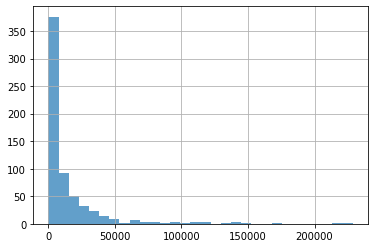

In [95]:
data_sport = data.loc[(data['total_genre_sport_consumption_seconds'] > 0)]
data_sport.total_genre_sport_consumption_seconds.hist(bins=30, alpha = 0.7)

<AxesSubplot:>

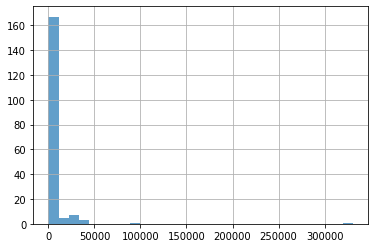

In [96]:
data_comedy = data.loc[(data['total_genre_comedy_consumption_seconds'] > 0)]
data_comedy.total_genre_comedy_consumption_seconds.hist(bins=30, alpha = 0.7)

<AxesSubplot:>

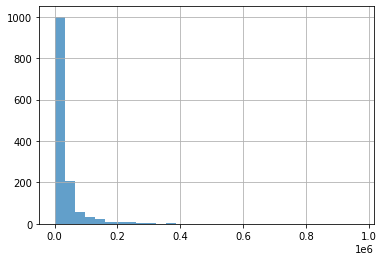

In [97]:
data_drama = data.loc[(data['total_genre_drama_consumption_seconds'] > 0)]
data_drama.total_genre_drama_consumption_seconds.hist(bins=30, alpha = 0.7)

<AxesSubplot:>

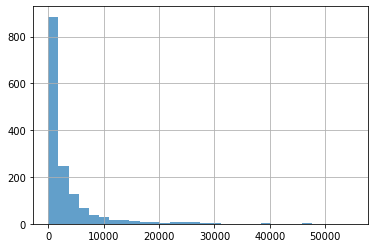

In [99]:
data_ITV = data.loc[(data['total_channel_ITV_consumption_seconds'] > 0)]
data_ITV.total_channel_ITV_consumption_seconds.hist(bins=30, alpha = 0.7)

<AxesSubplot:>

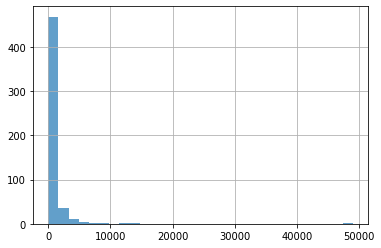

In [102]:
data_ITV2 = data.loc[(data['total_channel_ITV2_consumption_seconds'] > 0)]
data_ITV2.total_channel_ITV2_consumption_seconds.hist(bins=30, alpha = 0.7)

<AxesSubplot:>

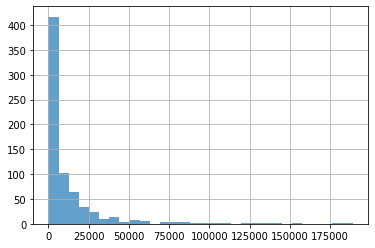

In [105]:
# total_watch_morning_consumption_seconds
data_morning = data.loc[(data['total_watch_morning_consumption_seconds'] > 0)]
data_morning.total_watch_morning_consumption_seconds.hist(bins=30, alpha = 0.7)

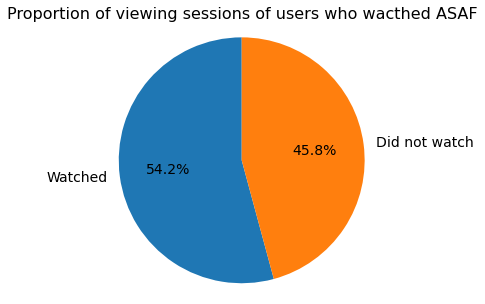

In [108]:
sizes = [data.loc[data['any_spy_among_friends_consumption']==True].shape[0], data.loc[data['any_spy_among_friends_consumption']==False].shape[0]]
labels = ['Watched', 'Did not watch']

fig, ax2 = plt.subplots(figsize=(8, 5))
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title('Proportion of viewing sessions of users who wacthed ASAF', fontsize=16)

plt.show()

- The age distributions of users who watched ASAF and who did not watch are similar, so as the gender distribution. See the histogram and count plot below:

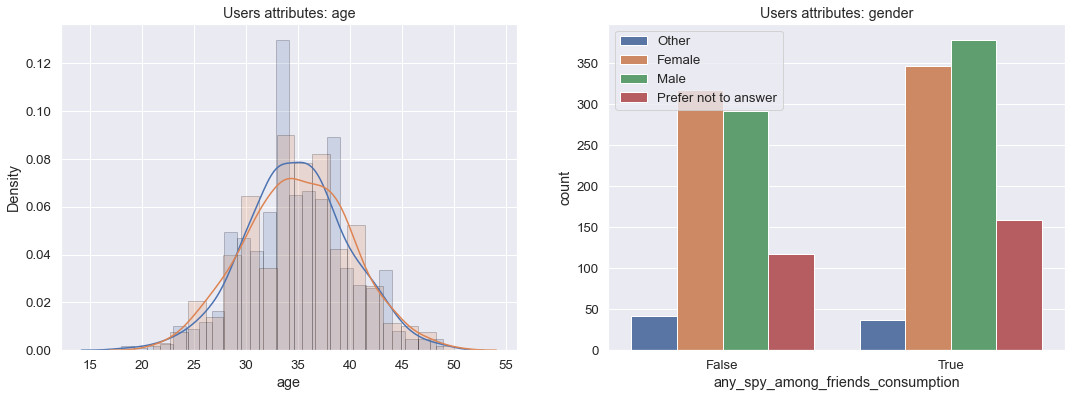

In [111]:
sns.set(font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

con_0 = data[data['any_spy_among_friends_consumption']==True]['age']
con_1 = data[data['any_spy_among_friends_consumption']==False]['age']
sns.distplot(con_0,label='Not watched', ax=ax[0],hist_kws=hist_kws)
sns.distplot(con_1,label='Watched', ax=ax[0],hist_kws=hist_kws)
ax[0].set_title('Users attributes: age')

sns.countplot(x='any_spy_among_friends_consumption', hue='gender', data=data,ax=ax[1])
ax[1].set_title('Users attributes: gender')

plt.legend()
plt.show()

- The correlation matrix below shows how strong is there a linear relationship between any two variables.
- For example, we see that n_episodes_watched shows strong positive linear relationship (>0.8) with total_channel_ITV_consumption_seconds, total_watch_dinner_consumption_seconds, total_platform_connected_tv_consumption_seconds,total_weekend_consumption_seconds, and  total_consumption_seconds

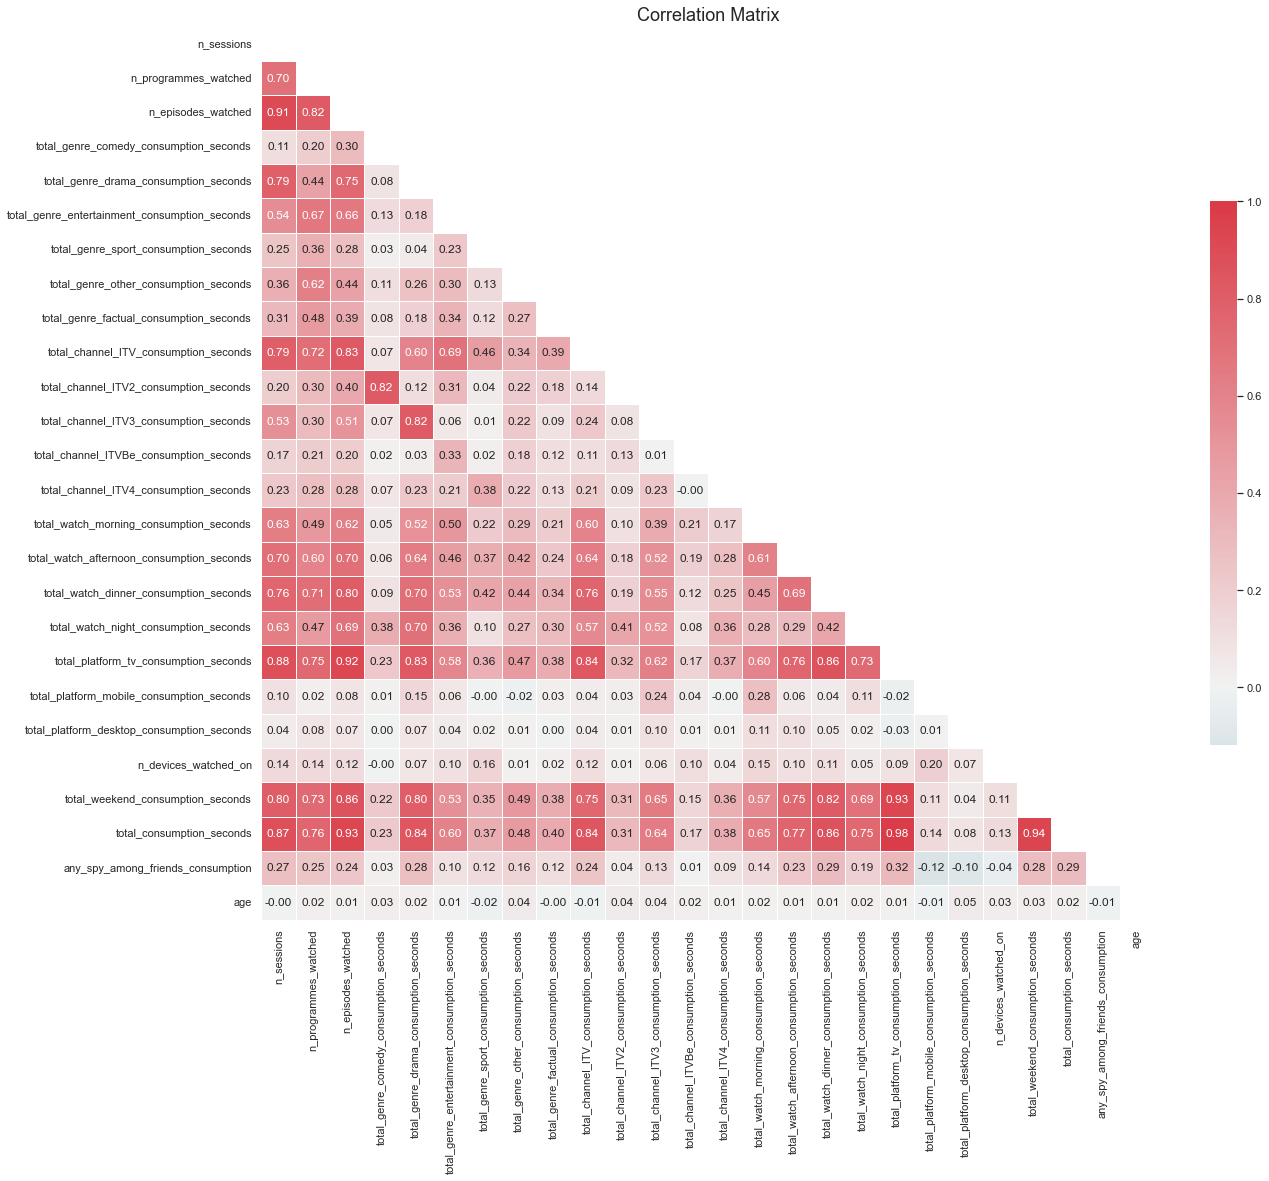

In [109]:
sns.set(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### 2. Data cleaning
#### 2.1. Missing data:
- Missing data was found in the 7 columns, namely 'top_3_genres', 'total_watch_night_consumption_seconds', 'total_platform_tv_consumption_seconds', 'n_devices_watched_on', 'total_consumption_seconds', 'age', and 'gender'.
- For numeric type data, i.e., 'total_watch_night_consumption_seconds', 'total_platform_tv_consumption_seconds', 'n_devices_watched_on', 'total_consumption_seconds', and 'age', we fill the missing data with the mean values of the corresponding column.
- For object type data, i.e., 'top_3_genres' and 'gender':
    - 'top_3_genres': in order not to create bias by using the most frequently appeared value to fill the missing data in this column, it is decided to remove the rows with missing data in 'top_3_genres'. The proportion of missing data in 'top_3_genres' is below 1.5%, so the impact of removing missing data should be negligible.
    - 'gender': for the missing data of 'gender', we can assume the users were not willing to reveal their gender. So we fill the missing data with 'Prefer not to answer'.

In [48]:
# create a copy of the original data
data_clean = data.copy()

In [49]:
# percentage of missing data in each attribute
print('percentage of missing data for each column:')
print('column                                                missing data %')
space = ' '
for column in data:
    if data[column].isnull().sum():
        print(column, space*(50-len(column)), data[column].isnull().sum()/len(data)*100)

percentage of missing data for each column:
column                                                missing data %
top_3_genres                                        1.4680971202710333
total_watch_night_consumption_seconds               7.396950875211744
total_platform_tv_consumption_seconds               4.121964991530209
n_devices_watched_on                                1.4680971202710333
total_consumption_seconds                           5.364201016374929
age                                                 6.380575945793337
gender                                              4.517221908526256


In [50]:
# only keep rows with no missing data of 'top_3_genres'
data_clean = data_clean[data_clean['top_3_genres'].notna()]
data_clean['top_3_genres'].isnull().sum()

0

In [51]:
# fill the missing data of the following columns with their mean values
data_clean.total_watch_night_consumption_seconds.fillna(data_clean.total_watch_night_consumption_seconds.mean(),inplace= True)
data_clean.total_platform_tv_consumption_seconds.fillna(data_clean.total_platform_tv_consumption_seconds.mean(),inplace= True)
data_clean.n_devices_watched_on.fillna(data_clean.n_devices_watched_on.mean(),inplace= True)
data_clean.total_consumption_seconds.fillna(data_clean.total_consumption_seconds.mean(),inplace= True)
data_clean.age.fillna(data_clean.age.mean(),inplace= True)

In [52]:
# fill the missing data of 'gender' with 'Prefer not to answer'
data_clean.gender.fillna('Prefer not to answer', inplace=True)

In [53]:
# check data cleaning result
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1770
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        1745 non-null   object 
 1   n_sessions                                     1745 non-null   int64  
 2   n_programmes_watched                           1745 non-null   int64  
 3   n_episodes_watched                             1745 non-null   int64  
 4   top_3_programmes                               1745 non-null   object 
 5   top_3_genres                                   1745 non-null   object 
 6   total_genre_comedy_consumption_seconds         1745 non-null   float64
 7   total_genre_drama_consumption_seconds          1745 non-null   float64
 8   total_genre_entertainment_consumption_seconds  1745 non-null   float64
 9   total_genre_sport_consumption_seconds          1745 

#### 2.2 Checking duplicated data 
- There is no duplicated rows in the dataset

In [54]:
dd = data_clean.duplicated()
print(data_clean.duplicated().sum())

0


### 3. Encoding object data and bool data
- There are 4 object type data excluding 'user_id'. Before we can implement models, we need to encode the interested object data into numeric data.

- Encode target data: 'any_spy_among_friends_consumption'
    - The data type of 'any_spy_among_friends_consumption' is bool, so we use lable encoding to turn this data into numeric data. We use '1' and '0' to represent who watched ASAF and who did not watch, respectively,

In [55]:
data_encode = data_clean.copy()

In [56]:
encode_map = {True:1, False:0}
data_encode['any_spy_among_friends_consumption'] = data_encode['any_spy_among_friends_consumption'].map(encode_map)

In [57]:
data_encode.head(3)

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
0,#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,1,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
1,+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,1,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
2,+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,1,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male


- Encoding variable data:
    - Data with lists: 'top_3_programmes', 'top_3_genres', and 'top_3_subgenres'
        - In this study, to simply the model, we only investigate the top programme/genre/subgenre, so we extract the top top programme, genre, or subgenre from the orginal data.
        - The 'top_programmes_1', 'top_genre_1', and 'top_subgenres_1' contain 216, 6, and 51 unique values, respectively. To simplify the model, in this study, we only investigate 'top_genres_1', which has 6 unique values so is easy to be encoded using the One-Hot encoding method.

In [58]:
# create new columns containing the top programme, genre, or subgenre.
data_encode["top_programmes_1"] = data_encode["top_3_programmes"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
data_encode["top_genre_1"] = data_encode["top_3_genres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
data_encode["top_subgenres_1"] = data_encode["top_3_subgenres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
display(data_encode[["top_3_programmes", "top_programmes_1", "top_3_genres", "top_genre_1", "top_3_subgenres", "top_subgenres_1"]])

,top_3_programmes,top_programmes_1,top_3_genres,top_genre_1,top_3_subgenres,top_subgenres_1
0,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...",WORLD CUP,"['DRAMA', 'FACTUAL', 'SPORT']",DRAMA,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",LONG RUNNING DRAMA
1,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",WITHOUT SIN,['DRAMA'],DRAMA,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",CRIME AND THRILLER
2,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...",WORLD CUP,"['ENTERTAINMENT', 'SPORT', 'DRAMA']",ENTERTAINMENT,"['FOOTBALL', 'EVENT', 'CELEBRITY']",FOOTBALL
3,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...",A SPY AMONG FRIENDS,"['DRAMA', 'ENTERTAINMENT', 'OTHER']",DRAMA,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",CRIME AND THRILLER
4,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']",WORLD CUP,"['SPORT', 'ENTERTAINMENT', 'DRAMA']",SPORT,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",FOOTBALL
...,...,...,...,...,...,...
1766,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...",WORLD CUP,"['SPORT', 'DRAMA', 'ENTERTAINMENT']",SPORT,"['FOOTBALL', 'EVENT', 'CELEBRITY']",FOOTBALL
1767,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'GO...",I'M A CELEBRITY... GET ME OUT OF HERE!,['ENTERTAINMENT'],ENTERTAINMENT,"['CELEBRITY', 'FACTUAL', 'TRAVEL']",CELEBRITY
1768,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'CO...",I'M A CELEBRITY... GET ME OUT OF HERE!,"['ENTERTAINMENT', 'DRAMA', 'SPORT']",ENTERTAINMENT,"['CELEBRITY', 'FOOTBALL', 'LONG RUNNING DRAMA']",CELEBRITY
1769,"['WORLD CUP', 'LOVE ISLAND', 'FA CUP']",WORLD CUP,"['SPORT', 'ENTERTAINMENT', 'COMEDY']",SPORT,"['FOOTBALL', 'EVENT', 'DATING SHOWS']",FOOTBALL


In [59]:
data_encode.describe(include="object")

,user_id,top_3_programmes,top_3_genres,top_3_subgenres,gender,top_programmes_1,top_genre_1,top_subgenres_1
count,1745,1745,1745,1745,1745,1745,1745,1745
unique,1745,1320,107,775,4,216,6,51
top,#ERROR!,['A SPY AMONG FRIENDS'],['DRAMA'],['CRIME AND THRILLER'],Male,A SPY AMONG FRIENDS,DRAMA,CRIME AND THRILLER
freq,1,97,336,126,660,327,930,548


In [60]:
# One-hot encoding to 'top_genre_1'
data_encode = pd.get_dummies(data=data_encode, columns=['top_genre_1'])
display(data_encode)

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,age,gender,top_programmes_1,top_subgenres_1,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT
0,#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,...,30.0,Other,WORLD CUP,LONG RUNNING DRAMA,0,1,0,0,0,0
1,+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,...,33.0,Female,WITHOUT SIN,CRIME AND THRILLER,0,1,0,0,0,0
2,+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,...,33.0,Male,WORLD CUP,FOOTBALL,0,0,1,0,0,0
3,+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,...,36.0,Prefer not to answer,A SPY AMONG FRIENDS,CRIME AND THRILLER,0,1,0,0,0,0
4,+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,...,32.0,Prefer not to answer,WORLD CUP,FOOTBALL,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,10,18,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['SPORT', 'DRAMA', 'ENTERTAINMENT']",0.000000,18113.978000,6554.567016,13111.289457,...,33.0,Male,WORLD CUP,FOOTBALL,0,0,0,0,0,1
1767,zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,2,12,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'GO...",['ENTERTAINMENT'],0.000000,0.000000,22751.175730,0.000000,...,40.0,Male,I'M A CELEBRITY... GET ME OUT OF HERE!,CELEBRITY,0,0,1,0,0,0
1768,zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,61,19,43,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'CO...","['ENTERTAINMENT', 'DRAMA', 'SPORT']",0.000000,454.293246,45363.418945,4581.746078,...,38.0,Prefer not to answer,I'M A CELEBRITY... GET ME OUT OF HERE!,CELEBRITY,0,0,1,0,0,0
1769,ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=,42,6,12,"['WORLD CUP', 'LOVE ISLAND', 'FA CUP']","['SPORT', 'ENTERTAINMENT', 'COMEDY']",0.000000,0.000000,22.287480,4245.628928,...,36.0,Female,WORLD CUP,FOOTBALL,0,0,0,0,0,1


### 4. Simplify variables and remove outliers
#### 4.1. As discussed, the data with subcategories show strong trend to contain large amout of outliers. To simplify the model, in this study we only look at n_sessions, n_sessions, n_devices_watched_on, total_consumption_seconds, age, gender, and top_genre_1.

In [121]:
data_out = pd.concat([data_encode.n_sessions,   
                      data_encode.n_episodes_watched, 
                      data_encode.n_devices_watched_on, 
                      data_encode.total_consumption_seconds, 
                      data_encode.age, 
                      data_encode.gender, 
                      data_encode.top_genre_1_COMEDY,
                      data_encode.top_genre_1_DRAMA,
                      data_encode.top_genre_1_ENTERTAINMENT,
                      data_encode.top_genre_1_FACTUAL,
                      data_encode.top_genre_1_OTHER,
                      data_encode.top_genre_1_SPORT,
                      data_encode.any_spy_among_friends_consumption], axis=1)
display(data_out)

,n_sessions,n_programmes_watched,n_episodes_watched,n_devices_watched_on,total_consumption_seconds,age,gender,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption
0,88,31,71,10.0,100236.786707,30.0,Other,0,1,0,0,0,0,1
1,13,5,7,1.0,10650.877000,33.0,Female,0,1,0,0,0,0,1
2,26,7,15,1.0,52660.124921,33.0,Male,0,0,1,0,0,0,1
3,39,8,22,2.0,78485.442042,36.0,Prefer not to answer,0,1,0,0,0,0,1
4,67,18,47,1.0,176989.167344,32.0,Prefer not to answer,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,19,10,18,2.0,37779.834473,33.0,Male,0,0,0,0,0,1,1
1767,27,2,12,1.0,22751.175730,40.0,Male,0,0,1,0,0,0,0
1768,61,19,43,3.0,56815.310210,38.0,Prefer not to answer,0,0,1,0,0,0,0
1769,42,6,12,1.0,45560.266020,36.0,Female,0,0,0,0,0,1,0


#### 4.2 Removing outliers

<AxesSubplot:>

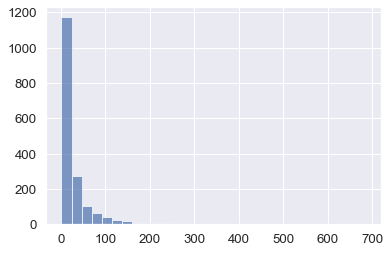

In [122]:
data_out.n_sessions.hist(bins=30, alpha = 0.7)

Outlier percentage: 10.37 %


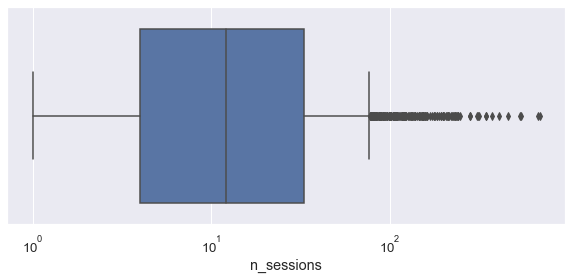

In [123]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data_out['n_sessions'])
outliers = [y for stat in boxplot_stats(data_out['n_sessions']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data_out)*100))

In [124]:
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR

data_out = data_out[~((data_out.n_sessions < (Q1.n_sessions - 1.5 * IQR.n_sessions)) | (data_out.n_sessions > (Q3.n_sessions + 1.5 * IQR.n_sessions)))]
data_out.shape

(1564, 14)

<AxesSubplot:>

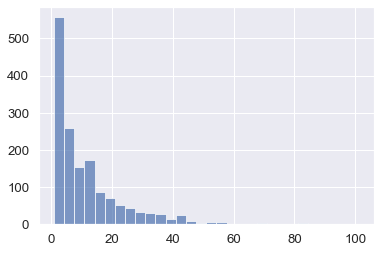

In [125]:
# n_episodes_watched
data_out.n_episodes_watched.hist(bins=30, alpha = 0.7)

Outlier percentage: 6.01 %


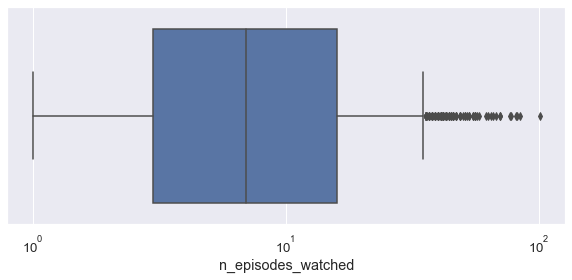

In [126]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data_out['n_episodes_watched'])
outliers = [y for stat in boxplot_stats(data_out['n_episodes_watched']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data_out)*100))

In [127]:
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR

data_out = data_out[~((data_out.n_episodes_watched < (Q1.n_episodes_watched - 1.5 * IQR.n_episodes_watched)) | (data_out.n_episodes_watched > (Q3.n_episodes_watched + 1.5 * IQR.n_episodes_watched)))]
data_out.shape

(1470, 14)

<AxesSubplot:>

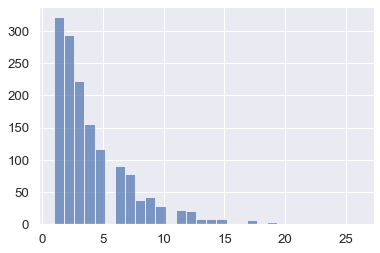

In [128]:
data_out.n_programmes_watched.hist(bins=30, alpha = 0.7)

Outlier percentage: 7.69 %


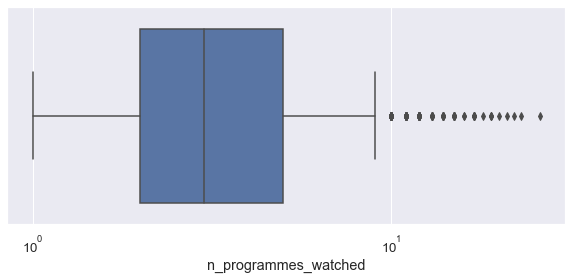

In [129]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data_out['n_programmes_watched'])
outliers = [y for stat in boxplot_stats(data_out['n_programmes_watched']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data_out)*100))

In [130]:
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR

data_out = data_out[~((data_out.n_programmes_watched < (Q1.n_programmes_watched - 1.5 * IQR.n_programmes_watched)) | (data_out.n_programmes_watched > (Q3.n_programmes_watched + 1.5 * IQR.n_programmes_watched)))]
data_out.shape

(1357, 14)

<AxesSubplot:>

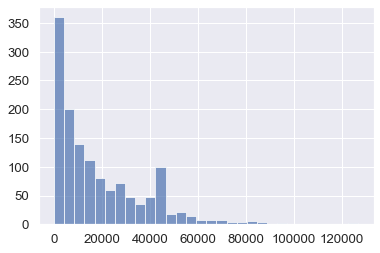

In [131]:
data_out.total_consumption_seconds.hist(bins=30, alpha = 0.7)

Outlier percentage: 2.65 %


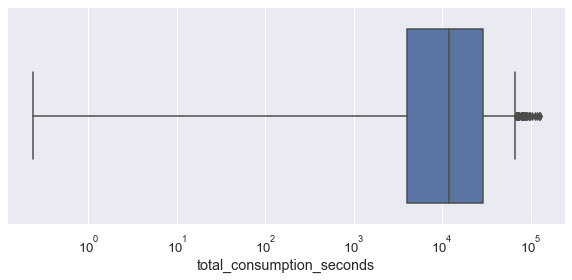

In [132]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data_out['total_consumption_seconds'])
outliers = [y for stat in boxplot_stats(data_out['total_consumption_seconds']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data_out)*100))

In [133]:
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR

data_out = data_out[~((data_out.total_consumption_seconds < (Q1.total_consumption_seconds - 1.5 * IQR.total_consumption_seconds)) | (data_out.total_consumption_seconds > (Q3.total_consumption_seconds + 1.5 * IQR.total_consumption_seconds)))]
data_out.shape

(1321, 14)

### 5. Modelling
#### 5.1 Data slit

In [138]:
data_out = pd.get_dummies(data=data_out, columns=['gender'])
y = data_out['any_spy_among_friends_consumption'].values
x = data_out.drop(['any_spy_among_friends_consumption'], 1).values
print(y.shape)
print(x.shape)

(1321,)
(1321, 16)


In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(1056,)
(1056, 16)
(265,)
(265, 16)


#### 5.2 Data standardisation

In [140]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 5.3 Logistic regression

In [141]:
LR_model = LogisticRegression(C=1).fit(x_train,y_train)
LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
yhat = LR_model.predict(x_test)
yhat_train = LR_model.predict(x_train)
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))
print(metrics.accuracy_score(y_test,yhat))

[[ 97  34]
 [ 28 106]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       131
           1       0.76      0.79      0.77       134

   micro avg       0.77      0.77      0.77       265
   macro avg       0.77      0.77      0.77       265
weighted avg       0.77      0.77      0.77       265

0.7660377358490567


<AxesSubplot:>

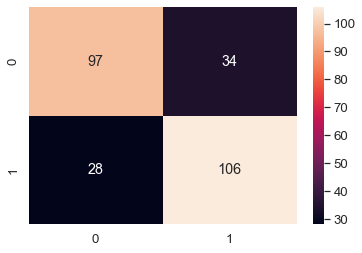

In [143]:
cm = metrics.confusion_matrix(y_test,yhat)
sns.heatmap(cm, annot=True, fmt='d')

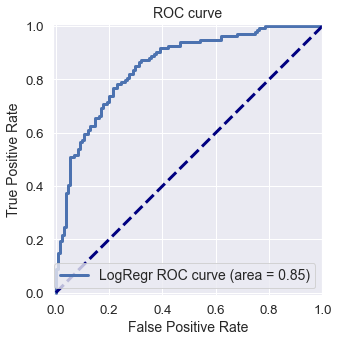

In [144]:
from sklearn.metrics import roc_curve, auc
y_predict_lr_prop= LR_model.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.axes().set_aspect('equal')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

#### 5.4. Decision Tree

In [145]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 12)
clf.fit(x_train, y_train)
yhat_f = clf.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_f))
print(metrics.classification_report(y_test,yhat_f))
print(metrics.accuracy_score(y_test,yhat_f))

[[97 34]
 [38 96]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       131
           1       0.74      0.72      0.73       134

   micro avg       0.73      0.73      0.73       265
   macro avg       0.73      0.73      0.73       265
weighted avg       0.73      0.73      0.73       265

0.7283018867924528


<AxesSubplot:>

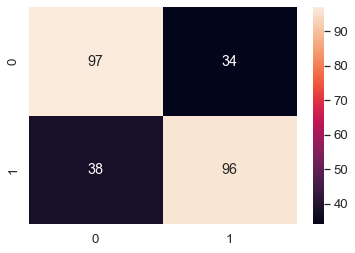

In [146]:
cm_f = metrics.confusion_matrix(y_test,yhat_f)
sns.heatmap(cm_f, annot=True, fmt='d')

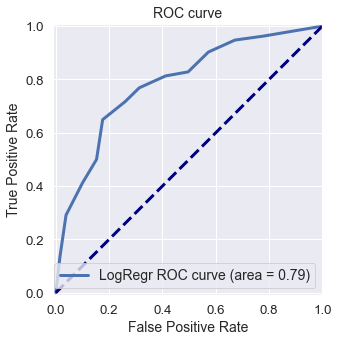

In [147]:
y_predict_lr_prop= clf.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.axes().set_aspect('equal')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

#### 5.5. Naïve Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(x_train, y_train)
yhat_g = GNBclf.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_g))
print(metrics.classification_report(y_test,yhat_g))
print(metrics.accuracy_score(y_test,yhat_g))

[[ 89  42]
 [ 26 108]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       131
           1       0.72      0.81      0.76       134

   micro avg       0.74      0.74      0.74       265
   macro avg       0.75      0.74      0.74       265
weighted avg       0.75      0.74      0.74       265

0.7433962264150943


<AxesSubplot:>

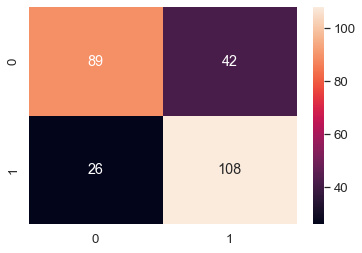

In [150]:
cm_g = metrics.confusion_matrix(y_test,yhat_g)
sns.heatmap(cm_g, annot=True, fmt='d')

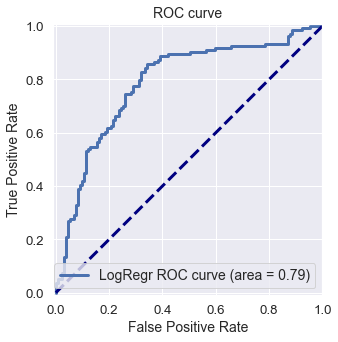

In [151]:
y_predict_lr_prop= GNBclf.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.axes().set_aspect('equal')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

## Conclusion: 
- Among the three models (Logistic regression, Decision Tree, and Naïve Bayes), the Logistic regression shows more accuract results than the other two models.